In [1]:
import re               # pattern matching
import requests         # getting data from web

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import collections      # Counting made easy


In [2]:
%matplotlib inline
plt.style.use('fivethirtyeight') # plt.style.available
plt.rcParams['figure.figsize'] = (15,5)
sns.set_style("darkgrid")


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_pickle('../sentiment_data', compression='gzip')

## Monkey Pandas Basics

**df.describe()** shows df basic statistical summary <br/>
**df.head(n)** shows first n rows, default = 5: eq. df.iloc[:n] <br/>
**df.tail(n)** shows last n rows eq. df.iloc[-n:]<br/>
**df.sample(n)** shows random n rows, default = 1, use frac=.n to get fraction of rows<br/>

**df.shape** shows rows and columns count<br/>
**df.dtypes** show columns data type<br/>
**df.columns** returns a list of columns name<br/>

**df.iloc[n:m]** select rows by indexed rows(uses python str,list slicing-like syntax)<br/>
**df.iloc[:,k:l]** select columns by indexed columns(uses python str,list slicing-like syntax)<br/>
   > e.g. ***_df.iloc[-5:,-2:]_*** select last 5 rows and last 2 columns<br/>
   
**df.loc[[n,m],[k,l]]** similiar to df.iloc but selects using sting<br/> 
   > e.g. ***_df.loc[['apple','mangoes'],['col_n','col_m']]_*** select row with apple and mangies and columns col_n and col_m<br/>
   
**df['col_n'].value_counts()** group and count col_n<br/>
**df['col_n'].unque()** returns col_n's unique values<br/>
**df['col_n'].nunque()** returns count of col_n's unique values<br/>

**df['col_n'].apply(_function_) & df.map(_function_)** similiar to map(_function_,values)<br/>
   > Series.apply(func, convert_dtype=True, args=(), \**kwds) allows adding of args and kwargs to the function<br/>
   > Series.map(arg, na_action=None) function cannot take args and kwargs <br/>
   > e.g. ***_df['col_n].map(lambda x:x+1) _*** adds 1 to numeric values ofcol_n, for df see .map()<br/>
   
**df.drop(columns=['col_n'],inplace=True)** drops col_n completely, rows can be dropped by index=[...]<br/>
  
**df.dropna()** drops nans <br/>
**df.fillna(value=n)** fills nans with n <br/>
   > e.g. ***_df.fillna({'col_n':df['col_n'].median(), 'col_m':0}, inplace=True) _*** completely fill col_n nans with its median, col_m with 0<br/>
   
**df.drop_dublicates(inplace=True)** completely drops dublicates <br/>

**df[['col_n','col_m']].astype(np.int32)**  cast data type of col_n and col_m to np.int32<br/>
**df['date'] = pd.to_datetime(df['date'],infer_datetime_format=False)**  cast string data type date to date <br/>

### Gorilla Pandas Basics
Use multiple conditions

df.drop(df[conditions].index)<br/>
  > **df.drop(df[(df['features'].str.len() < 3) & (df['word_count'] > 20000)].index, inplace=True)**<br/>
  > **df[(df['rating']<3) | (df['rating']>3)]**<br/>
  > **df[~(df['rating']==3)]**<br/>
  Note: Pandas logical operators: **|** for **or**, **&** for **and**, and **~** for **not**. Parentheses _()_ used to chain them.<br/>

You can chain commands to make awesome queries e.g <br/>
** df.group(['col_n','col_m']).sum().unstack().fillna(-9999).rolling(12).avg()**

## jupyter magic commands
- **%time** one line one loop timer
- **%%time** mult-lines one loop timer
- **%[%]timeit** multiple loops find best time, default 100,000 times

### Explore our data

In [6]:
df.sample(5) #.head() and .tail()

,datePublished,headline,inLanguage,ratingValue,reviewBody,reviewerName
41623,2017-11-18 13:24:21,Fungerede til UG,da,5,Fungerede til UG,Svend
220242,2016-08-05 15:35:28,"Forsunket. Våd, hullet emballage",da,2,Ville gerne her sende et billede af en våd og ...,Alm. kunde
443006,2012-01-30 12:11:32,Intet at udsætte på dem,da,5,Da jeg valgte at købe mobil gennem Telenor var...,Thomas Rasmussen
464874,2017-11-10 11:10:32,Problemfri handel.,da,5,Problemfri bestilling. Hurtig og problemfri le...,Erling Friis Pedersen
45402,2017-11-11 19:00:56,helt ok,da,5,helt ok. - hurtig levering,Erik Jacobsen


In [7]:
df.shape

(628259, 6)

In [8]:
df.dtypes

datePublished    datetime64[ns]
headline                 object
inLanguage               object
ratingValue               int32
reviewBody               object
reviewerName             object
dtype: object

#### randomaize data, set seed for reproducibility, make a copy

In [9]:
np.random.seed(7)
data = df.reindex(np.random.permutation(df.index))

#### double check to see if data contains our language of choice. if not, do something about it
e.g. data = data[(data['inLanguage']=='da')]

In [10]:
data['inLanguage'].unique()

array(['da'], dtype=object)

Keep on the columns that we are after reviews and their ratings

In [11]:
data = data[['reviewBody','ratingValue']]
# or this:
# data.drop(columns=['headline','datePublished','inLanguage','reviewerName'], inplace=True)

Change column names to something more DS (Absolutely unnecessary)

In [12]:
data.rename(columns={'reviewBody':'features','ratingValue':'target'}, inplace=True)

In [17]:
data.iloc[10:15]

,features,target
405284,"Altid fremragende service hos post.dk, min sæd...",5
441451,"Jeg blev ringet op af en sælger, der solgte mi...",2
63283,"God servise, aflevering til tiden.",4
179442,Fik sms besked og mail fra morgenstunden på at...,3
287829,Pakke omdelt og afleveret selvom jeg med vilje...,3


#### Let's check if there are nulls 
if there are null, drop them. You can use data.dropna(axis=0, how='any', inplace=True) # axis=0 row =1 columns <br/>
**Tip:** _data.isnull().sum().sum()_ returns groupped null count

In [18]:
data.isnull().sum()

features    0
target      0
dtype: int64

##### Check if we have empty or 1 length features

In [19]:
data[(data['features'].str.strip().str.len()<2)]

,features,target
446878,,2
410174,,1
406190,1,1
434891,,1
40581,,1
406536,-,5
405955,-,5
406567,1,5
426502,,1
406325,5,5


##### drop them

In [20]:
data.drop(index=data[(data['features'].str.len()<2)].index, inplace=True)

### EDA finally

{5: 373381, 4: 87146, 1: 84882, 2: 42350, 3: 40490} 



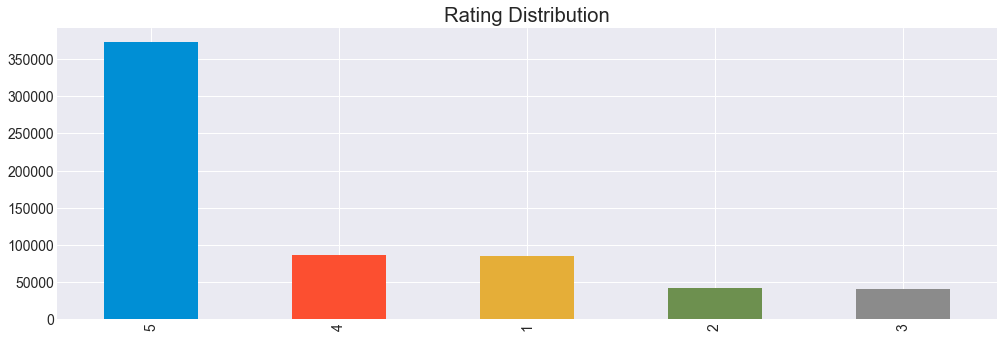

In [21]:
print(data['target'].value_counts().to_dict(),'\n')
_ = data['target'].value_counts().plot(kind='bar', title='Rating Distribution')

### Are lengthy reviews leaning towards negative sentiment?

In [22]:
data['featureLength'] = data['features'].str.len()

In [23]:
kwargs = dict(x='target', y='featureLength',data=data,
                  size=10, color='b')

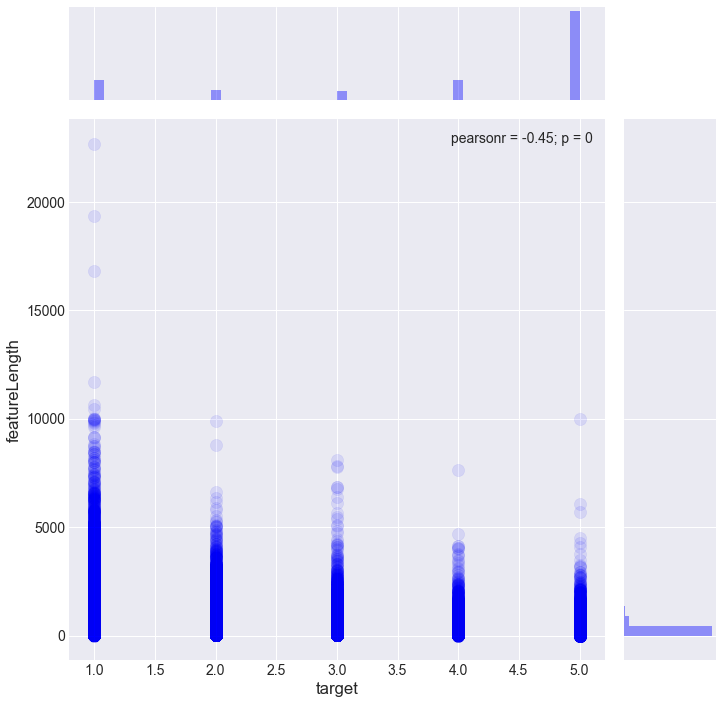

In [24]:
g = sns.jointplot(kind='scatter',**kwargs, joint_kws={'s':150, 'alpha':.09})

Text(0.5,1,'Less Crowded: Review Length || Rating Score')

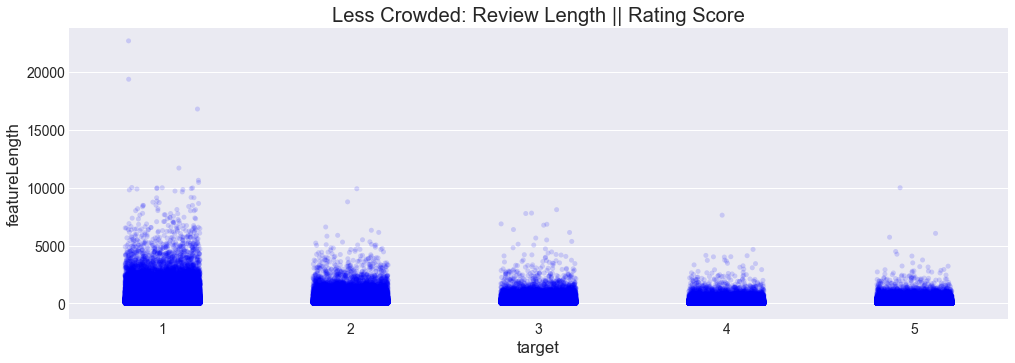

In [25]:
g = sns.stripplot(jitter=.2,s=5, alpha=.15,**kwargs)
plt.title('Less Crowded: Review Length || Rating Score', loc='center')

In [26]:
#sns.violinplot(**kwargs, palette="Pastel1")


In [27]:
# Lets  drop rating of 3, and group 1-2 as 0, and 4-5 as 1

data.drop(data[~(data['target']!=3)].index, inplace=True) #or data= data[(data['target'] !=3)]
# what! Explain? Pandas filter True condition, data['target']!=3 creates a boolen where 3 is false,
# we negate this, so that what we want is false, and what we don't want, True, and thus droped.
# this would give us the results: data.drop(data[(data['target']==3)].index, inplace=True)
# the first is used just to show how to use ~ negation ;)

data['y'] = np.where(data['target']>3,1,0)

{1: 460527, 0: 127232} 



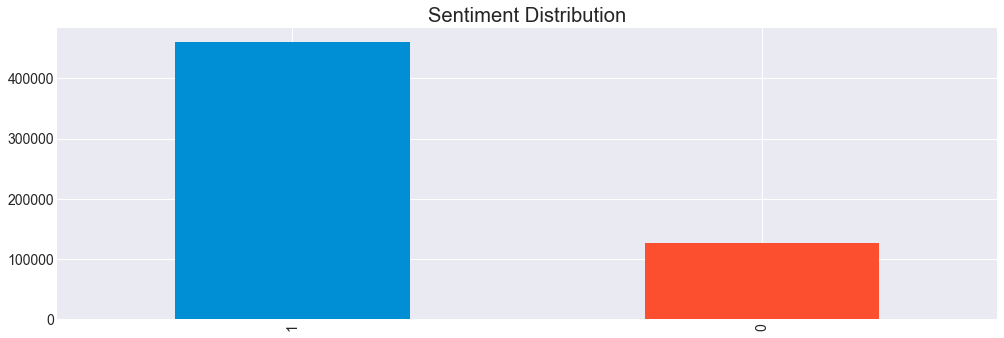

In [28]:
print(data['y'].value_counts().to_dict(),'\n')
_ = data['y'].value_counts().plot(kind='bar', title='Sentiment Distribution')

### How are words used in positive | negative rated reviews
 use a helper function :) https://gist.github.com/Proteusiq/85f9d1131f8256e05234fd57c564d2e9


In [29]:
def terms_frequency(corpus, words_only=False,emoji_only=False, emoji_normalize=False):
    
    '''
    Takes in texts and returns a pandas DataFrame of words frequency
    words_only=True if only words needed
    emoji_only=True if only emoji_only. emoji_nomalize removes noses and turn ; to :
    requirement = pandas
    '''
    corpus_ = corpus.lower()
    # eyes [nose] mouth | mouth [nose] eyes pattern
    emoticons = r"(?:[<>]?[:;=8][\-o\*\']?[\)\]\(\[dDpP/\:\}\{@\|\\]|[\)\]\(\[dDpP/\:\}\{@\|\\][\-o\*\']?[:;=8][<>]?)"
    emoticon_re = re.compile(emoticons, re.VERBOSE | re.I | re.UNICODE)
    
    if words_only:
        terms = (re.sub('[\W]+', ' ', corpus_)).split()
    
    elif emoji_only:
        terms = re.findall(emoticon_re, corpus_)
    
    else:
        if emoji_normalize:
            normalize_str = (re.sub('[\W]+', ' ', corpus.lower()) +
                                  ' '.join(re.findall(emoticon_re, corpus)).replace(';',':').replace('-',''))
            terms = normalize_str.split()
        else:
            terms = (re.sub('[\W]+', ' ', corpus_).split())
            terms.extend(re.findall(emoticon_re, corpus_))
                                                        
    
    terms_freq = pd.DataFrame.from_dict(collections.Counter(terms), orient='index').reset_index()

    terms_freq = terms_freq.rename(columns={'index':'word', 0:'count'}).sort_values('count',ascending=False)
                
    terms_freq.reset_index(inplace=True)
    terms_freq.drop('index',axis=1,inplace=True)
                                                             
    return terms_freq

In [30]:
# get positive and negative texts

In [31]:
%%time
pos = data[data['y']==1]
neg = data[data['y']==0]

pos_text = pos['features'].to_string(index=False)
neg_text = neg['features'].to_string(index=False)

Wall time: 9.69 s


In [32]:
%%time
pos_df = terms_frequency(pos_text, emoji_normalize=True)
neg_df = terms_frequency(neg_text, emoji_normalize=True)

Wall time: 8.35 s


In [33]:
pos_df.head(10)

,word,count
0,og,156771
1,hurtig,101410
2,levering,92389
3,jeg,69278
4,det,56307
5,til,51362
6,god,51135
7,at,49428
8,er,49089
9,en,46082


In [34]:
neg_df.loc[:10,]

,word,count
0,jeg,42496
1,at,32809
2,en,29912
3,i,26268
4,er,22610
5,har,21584
6,pakke,19141
7,ikke,18077
8,og,18017
9,til,17173


In [35]:
pos_neg_df = pos_df.merge(neg_df.drop_duplicates(), on=['word'], 
                   how='left', indicator=True)

neg_pos_df = neg_df.merge(pos_df.drop_duplicates(), on=['word'], 
                   how='left', indicator=True)

In [36]:
pos_neg_df.head()

,word,count_x,count_y,_merge
0,og,156771,18017.0,both
1,hurtig,101410,738.0,both
2,levering,92389,4607.0,both
3,jeg,69278,42496.0,both
4,det,56307,16782.0,both


In [37]:
def show_shared_words(viz_data,title='Shared Words'):
    g=sns.regplot(data=viz_data, x='count_y', y='count_x',
                    fit_reg=False, color='skyblue', scatter_kws={'s':50})

    # add annotations one by one with a loop
    for i, _ in enumerate(viz_data):
         g.text(viz_data['count_y'][i], viz_data['count_x'][i],viz_data['word'][i],
                horizontalalignment='left', size='medium', color='black', weight='semibold')

    plt.title(title, loc='center')

In [38]:
p_data, n_data = pos_neg_df[(pos_neg_df['_merge']=='both')],  neg_pos_df[(neg_pos_df['_merge']=='both')]


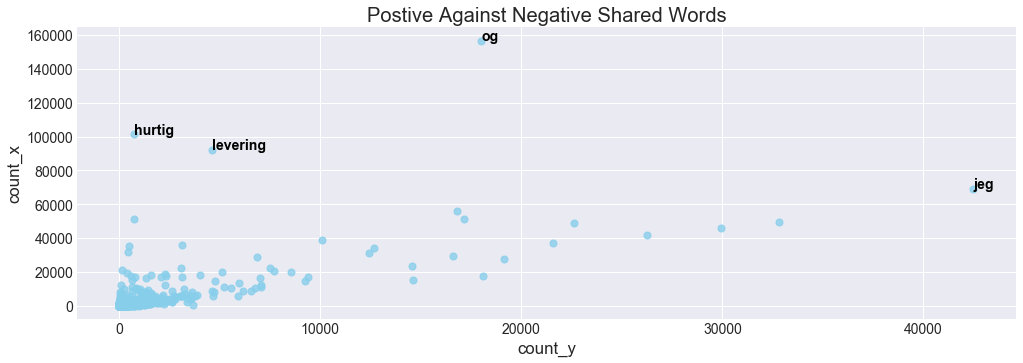

In [39]:
show_shared_words(p_data,'Postive Against Negative Shared Words')

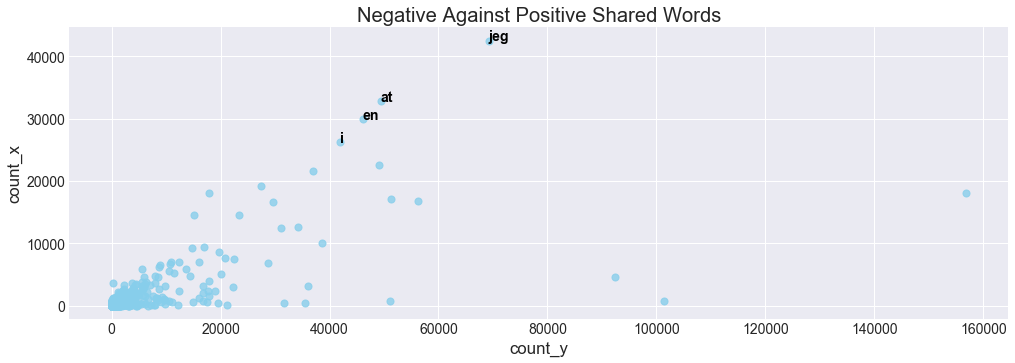

In [40]:
show_shared_words(n_data,'Negative Against Positive Shared Words')

In [41]:
# Stopwords ISO https://github.com/stopwords-iso maintained by Gene Diaz
# The most comprehensive collection of stopwords for multiple languages

url = 'https://raw.githubusercontent.com/stopwords-iso/stopwords-da/master/stopwords-da.json'
r = requests.get(url) # for large files use stream=True

if r.ok:
    stop_words = set(r.json())

In [46]:
stops = stop_words - set(['aldrig','god','godt','ikke','ingen','intet']) # from what we know

#Not how to do it & Knowledge of your data
stops = stops.union(set(['hjemme','hilsen','service','pakken','pakke','pakker','sms','post','bestil','bestilte','bestilt',
                         'levering','postnord','kr','kl','levered','leveret','gang','gange','mail',
                         'besked','dag','dage','ring','alm brand','dansk bank'])) # all kind of ring?

In [47]:
# Pandas allows as to do more. e.g. We can remove words in with certain regex, str.contains
ring_words = neg_df[neg_df['word'].str.contains('^ring\w{,2}$',regex=True)]['word'].values.tolist()

In [49]:
# Even better
comb_words = pos_df[pos_df['word'].str.contains('^pakk|^post|^lever|^bestil|^trac|^dage',regex=True)]['word'].values.tolist()

In [50]:
stops = stops.union(set(ring_words+comb_words))

In [51]:
_ = pos_df.set_index('word').loc[stops].sort_values('count', ascending=False)
_.head(5)

,count
word,
og,156771.0
levering,92389.0
jeg,69278.0
det,56307.0
til,51362.0


In [52]:
# SQL SELECT * FROM pos_df WHERE count < 10 OR word in (SELECT * FROM Stopwords) OR (SELECT LEN(word) ...)<2 
# Filter that out :)

pos_df.drop((pos_df[(pos_df['count']<10) | 
                    (pos_df['word'].apply(lambda x: x in stops)) 
                    | (pos_df['word'].str.len()<2)].index))

,word,count
1,hurtig,101410
6,god,51135
14,hurtigt,35435
16,super,31626
24,nemt,21135
28,fin,19563
31,godt,17911
32,ikke,17897
34,problemer,17433
36,tilfreds,16846


In [53]:
def tune_df(df, word_len=2, word_count=10, stop_words=stops):
    df.drop((df[(df['count']<word_count) | 
                    (df['word'].apply(lambda x: x in stops)) 
                    | (df['word'].str.len()<word_len) ].index),inplace=True)
    return df
    

In [54]:
neg_df = tune_df(neg_df)
pos_df = tune_df(pos_df)

In [55]:
pos_neg_df = pos_df.merge(neg_df.drop_duplicates(), on=['word'], 
                   how='left', indicator=True)

neg_pos_df = neg_df.merge(pos_df.drop_duplicates(), on=['word'], 
                   how='left', indicator=True)

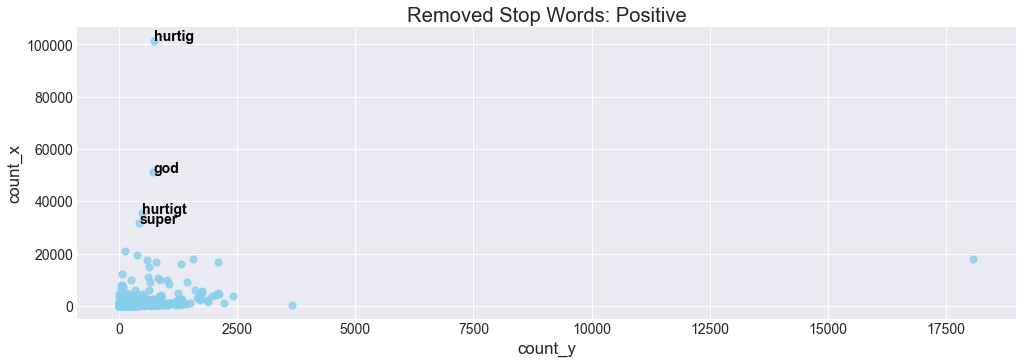

In [56]:
show_shared_words(pos_neg_df,'Removed Stop Words: Positive')

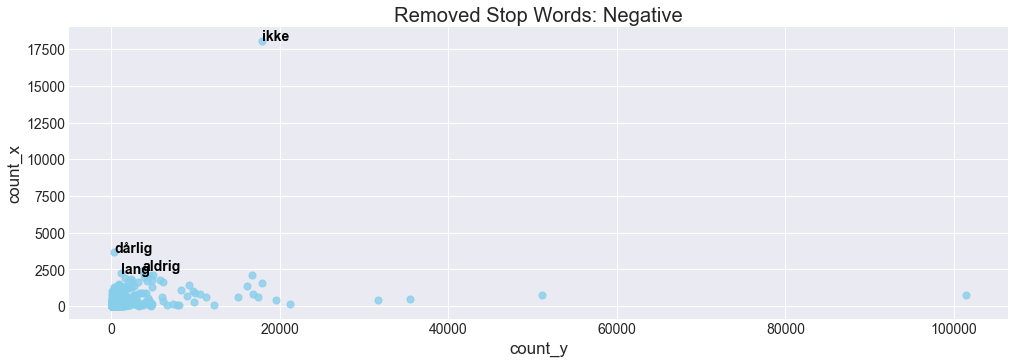

In [57]:
show_shared_words(neg_pos_df,'Removed Stop Words: Negative')

## Three Ways of Building Sentiment Models (Possibly More!)
- [ ] Lexicon Way
- [x] Machine Learning Way
- [ ] Both Ways

### AFINN by [Finn Årup Nielsen (DTU)](https://github.com/fnielsen) 

##### afinn is Finn's giant contribution to NLP  
The basic idea is to score words in a sentince with their predefined score

### Nuggets from [Ken Benoit's](http://www.kenbenoit.net/cv/publications/) papers on Lexicon Scoring

Absolute Proportional Difference. Bounds: [0,1]

Sentiment = (P − N) / N

Disadvantage: A sentence's score is affected by non-sentiment-related content.

Relative Proportional Difference. Bounds: [-1, 1]

Sentiment = (P − N) / (P + N)

Disadvantage: A sentence's score may tend to cluster very strongly near the scale endpoints (because they may contain content primarily or exclusively of either positive or negative).

Logit scale. Bounds: [-infinity, +infinity]

Sentiment = log(P + 0.5) - log(N + 0.5)

This tends to have the smoothest properties and is symmetric around zero. The 0.5 is a smoother to prevent log(0). 

In [58]:
url = 'https://raw.githubusercontent.com/fnielsen/afinn/master/afinn/data/'
url_words = 'AFINN-da-32.txt'
url_emoji = 'AFINN-emoticon-8.txt'

scored_words = pd.read_csv(url+url_words,sep='\t', names = ['ord','score'])
scored_emoji = pd.read_csv(url+url_emoji,sep='\t', names = ['ord','score'])


In [59]:
scored_words.sample(10)

,ord,score
711,forbedrer,2
43,afskyeligt,-3
1886,modstander,-2
936,fremdrift,2
862,forskrækket,-2
2512,skyde,-1
2032,omhu,2
3238,utak,-2
1512,kompetent,2
34,aflyste,-2


In [61]:
scored_emoji.sample(5)

,ord,score
35,;),2
23,:-/,-2
95,xoxoxoxo,4
10,:-),2
61,:)))))))),4


In [62]:
sentence = 'jeg hader ms excel :('
a = [sum(scored_words.loc[scored_words['ord'].isin([word]),'score']) for word in sentence.split() if word in scored_words.values]
a

[-3]

In [64]:
scored_words[(scored_words['ord'] == 'hader')|(scored_words['ord'] == ':(')]

,ord,score
1142,hader,-3


In [65]:
P = sum(1 for x in a if x > 0) #Number of Positive Values
N = sum(1 for x in a if x < 0) #Number of Negative Values

AP = sum(x for x in a if x > 0) # Adding Weight
AN = sum(x for x in a if x < 0)

(P, N, AP, AN)

(0, 1, 0, -3)

In [66]:
print('(P - N)/(N if N!=0  else 1):\n',(P - N)/(N if N!=0  else 1))

(P - N)/(N if N!=0  else 1):
 -1.0


In [67]:
print('(P - N)/(P + N):\n',(P - N)/(P + N))

(P - N)/(P + N):
 -1.0


In [68]:
print('log(P+0.5) - log(N+ 0.5):\n {:.3f}'.format(np.log(P+0.5) - np.log(N+ 0.5)))

log(P+0.5) - log(N+ 0.5):
 -1.099


In [69]:
print('Taking weight into account: Relative Weighted Proportional Difference')
print(f'(AP - abs(AN))/(AP + abs(AN)):\n{(AP - abs(AN))/(AP + abs(AN)):.2f}') # Hello f strings

Taking weight into account: Relative Weighted Proportional Difference
(AP - abs(AN))/(AP + abs(AN)):
-1.00


## We can test how good such models are

##### Tokinze sentences, then apply our basic Lexicon function

In [70]:
def token(X, 
         words_only=False,word_normalize=False,
         emoji_normalize=False,remove_digits=True,
          lower_case=False,stop_words=None):
        '''
        requires Stemming if word_normalize = True
        use pip[env] install stemming 
        stop_words can be pass as list, dict or sets
        '''
        
        # eyes [nose] mouth | mouth [nose] eyes pattern
        emoticons = r"(?:[<>]?[:;=8][\-o\*\']?[\)\]\(\[dDpP/\:\}\{@\|\\]|[\)\]\(\[dDpP/\:\}\{@\|\\][\-o\*\']?[:;=8][<>]?)"
        emoticon_re = re.compile(emoticons, re.VERBOSE | re.I | re.UNICODE)
        
        # Keep word only. Digit are consider true Emojis false
        if words_only:
            clean_text = re.sub('[\W]+', ' ', X)
        else:
            clean_text = '{}{}'.format(re.sub('[\W]+', ' ', X),
                          ''.join(re.findall(emoticon_re, X)))

        # normalize emoji?
        if emoji_normalize:

            clean_text = (re.sub('[\W]+', ' ', X) +
                                  ' '.join(re.findall(emoticon_re, X)).replace(';',':').replace('-','')
                         ) 

        if remove_digits:
            clean_text = clean_text.translate(str.maketrans('','','0123456789'))
       
        if lower_case:
            clean_text = clean_text.lower()
        
        if word_normalize:
            try:
                import Stemmer
                stemmer = Stemmer.Stemmer('danish')
                clean_text = ' '.join(stemmer.stemWords(clean_text.split()))
            except ModuleNotFoundError:
                print('Stemmer is not found. Try "pip install pystemmer"')
                print('Words not normalize')
                pass #Continue with issue
            
        
        if stop_words:
            return [word for word in clean_text.split() if word not in stop_words]
        else:
            return clean_text.split()

## What is tokenization & showing the power of Pandas .apply()

In [71]:
kwargs = [ dict(word_normalize=True,
                emoji_normalize=True,remove_digits=True,
                lower_case=True,stop_words = stops),  
          dict(word_normalize=False,
                emoji_normalize=False,remove_digits=False,
                  lower_case=False,stop_words=None)]

In [72]:
sample_data = data[['features']].sample(10)

sample_data['tokenizer_1'] = sample_data['features'].apply(token, **kwargs[0])
sample_data['tokenizer_2'] = sample_data['features'].apply(token, **kwargs[1])

##### tokenizer_1 normalize words, using stemming method(lemmatization is better but ...), keeps emojis, removes digits, lower case everything, and remove stop_words
##### tokenizer_2 does not nomalize words, removes emojis, keeps digits, does not lower case words, and keeps stop_words

sample_data

In [73]:
for index, contents in enumerate(sample_data.iloc[0]):
    print(f'{sample_data.columns[index]:}: {contents}\n')

features: Jeg har flex men pakken blev ikke afleveret på det aftalte sted.Jeg ringede 2 gange til kundeservice og de lovede at genudbringe min pakke. Jeg sad en hel dag og ventede og til sidst måtte jeg  slæbe den tunge pakke hjem fra posthuset .

tokenizer_1: ['flex', 'pak', 'ikk', 'aflev', 'aftalt', 'sted', 'kundeservic', 'loved', 'genudbring', 'pak', 'sad', 'hel', 'vented', 'sidst', 'måt', 'slæb', 'tung', 'pak', 'hjem']

tokenizer_2: ['Jeg', 'har', 'flex', 'men', 'pakken', 'blev', 'ikke', 'afleveret', 'på', 'det', 'aftalte', 'sted', 'Jeg', 'ringede', '2', 'gange', 'til', 'kundeservice', 'og', 'de', 'lovede', 'at', 'genudbringe', 'min', 'pakke', 'Jeg', 'sad', 'en', 'hel', 'dag', 'og', 'ventede', 'og', 'til', 'sidst', 'måtte', 'jeg', 'slæbe', 'den', 'tunge', 'pakke', 'hjem', 'fra', 'posthuset']



### With that said, lets test our simple lexicon scoring model

In [74]:
token_kwargs = dict(emoji_normalize=True,remove_digits=True,
                        lower_case=True,stop_words=stops)

In [75]:
def sentiment_score(sentence):
    '''
    Relative Weighted Proportional Difference'
    returns weighted sentiment
    '''
    a = [sum(scored_words.loc[scored_words['ord'].isin([word]),'score']) for word in token(sentence,**token_kwargs) if word in scored_words.values]
    AP = sum(x for x in a if x > 0)
    AN = sum(x for x in a if x < 0)
    
    return (AP - abs(AN))/(AP + abs(AN)) if (AP + abs(AN)) !=0 else 1

In [79]:
# Give me a equal sample of data, test data, keep only features and target
pos_data = pos.sample(50)
neg_data = neg.sample(50)

test_data = pos_data.append(neg_data, ignore_index=True)['features y'.split()]

In [80]:
test_data['sentiment'] = test_data['features'].map(sentiment_score)
test_data['y_pred'] = test_data['sentiment'].apply(lambda x: 1 if x >0 else 0) 

In [81]:
print(f"Scored {np.mean(test_data['y']==test_data['y_pred']):.1%} correctly")

Scored 76.0% correctly


In [82]:

def avg_accuracy(k=100, nsample=50):
    '''
    Get mean scores of our simple lexicon scoring
    '''
    avg_score = list()
    for i in range(1,k+1):
        print(f'{i}', end=' ')
        pos_data = pos.sample(nsample)
        neg_data = neg.sample(nsample)

        test_data = pos_data.append(neg_data, ignore_index=True)['features y'.split()]
        
        test_data['sentiment'] = test_data['features'].map(sentiment_score)
        test_data['y_pred'] = test_data['sentiment'].apply(lambda x: 1 if x >0 else 0) 
        
        avg_score.append(np.mean(test_data['y']==test_data['y_pred']))
    avg_score = np.array(avg_score)
    print(f"\nMean Scored: {avg_score.mean():.1%}\n\tStd: {avg_score.std():.3f}")

In [83]:
%%time
avg_accuracy(k=15)   

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 
Mean Scored: 71.4%
	Std: 0.027
Wall time: 13.9 s


### Impressive results! ah!
I think it is impressive given that this is a very basic lexicon scoring, made in less than 5 minutes<br>
Finn's model is way complex and much better. <br>
<br>
**This raises some questions:**
* Why use Machine Learning if simple lexicon scoring works? 
* Can Machine learning do better?
* How about combaining the two?

### Get some powers with ML
##### A Very Short Introduction 

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import (CountVectorizer, TfidfVectorizer,
                                             TfidfTransformer)

In [85]:
# Words in Context
# Before we only look at unigrams. We could advance our methods with n-grams e.g. 2-3 words
ct_para = dict(analyzer='word',stop_words=stops, 
                 tokenizer=token, ngram_range=(2, 3), min_df=10)

def count_words(feature):
    
    ct = CountVectorizer(**ct_para)
    print('counting words ...')
    words = ct.fit_transform(feature)
    print('Words counted')
    words.sum(axis=0).A1
    
    words = collections.Counter(dict(zip(list(ct.get_feature_names()),words.sum(axis=0).A1 )))
    

    n_grams = collections.OrderedDict(words.most_common())
    n_grams_df = pd.DataFrame.from_dict(n_grams, orient='index').reset_index()
    
    return n_grams_df.rename(columns={'index':'n_grams', 0:'count'})

In [86]:
%%time
n_grams_pos_df = count_words(pos['features'])

counting words ...
Words counted
Wall time: 52.1 s


In [97]:
n_grams_pos_df.iloc[10:15]

,n_grams,count
10,super god,4094
11,fin hurtig,3805
12,hurtig effektiv,3748
13,god information,3538
14,hele vejen,3395


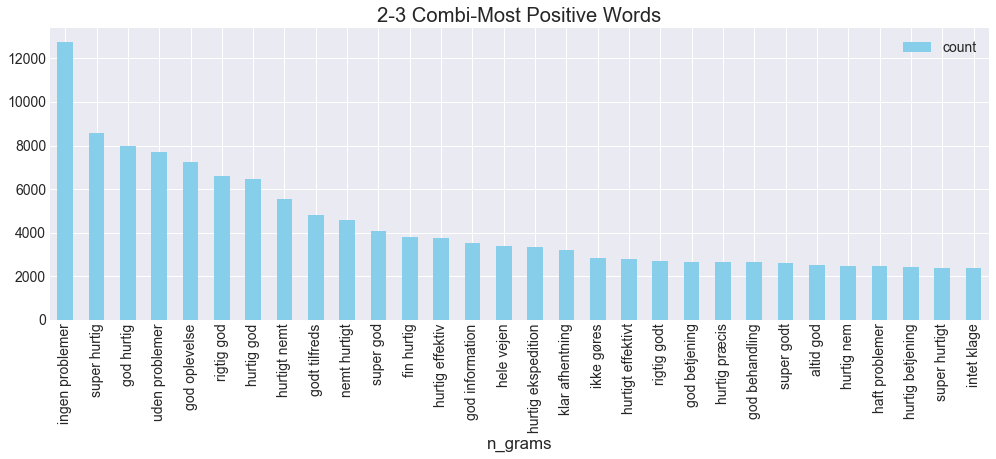

In [89]:
g = n_grams_pos_df.iloc[:30].plot(kind='bar', x='n_grams', y='count', color='skyblue', title='2-3 Combi-Most Positive Words')

In [90]:
%%time
n_grams_neg_df = count_words(neg['features'])

counting words ...
Words counted
Wall time: 1min 9s


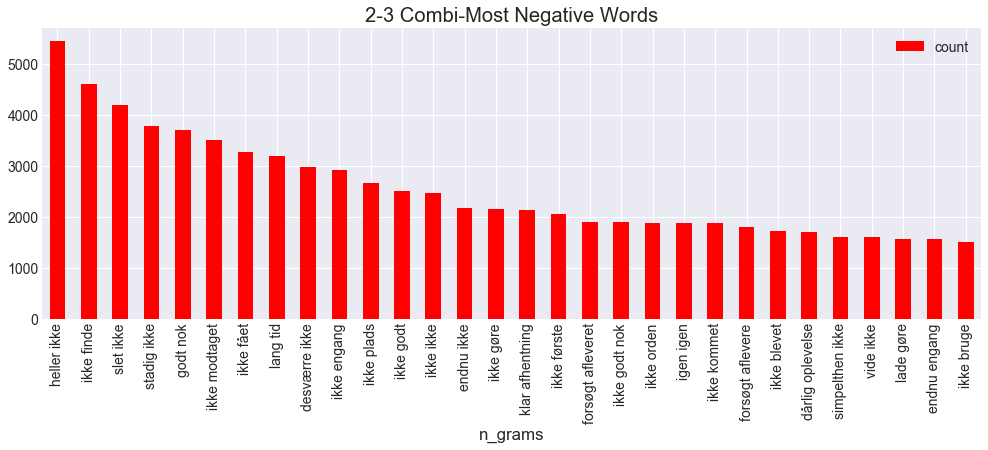

In [91]:
g = n_grams_neg_df.iloc[:30].plot(kind='bar', x='n_grams', y='count', color='red', title='2-3 Combi-Most Negative Words')

In [92]:
# Create a customer Sklearn-like Cleaner

class DanishCleaner(TransformerMixin):
    '''
    re has to be loaded
    '''
    
    def __init__(self, 
                 words_only=False,word_normalize=False,emoji_normalize=False,
                 remove_digits=False,lower_case=False, token=False):
        
        self.words_only = words_only
        self.word_normalize = word_normalize
        self.emoji_normalize = emoji_normalize
        self.remove_digits = remove_digits
        self.lower_case = lower_case
        self.token = token
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        self.X = X
        
        # eyes [nose] mouth | mouth [nose] eyes pattern
        emoticons = r"(?:[<>]?[:;=8][\-o\*\']?[\)\]\(\[dDpP/\:\}\{@\|\\]|[\)\]\(\[dDpP/\:\}\{@\|\\][\-o\*\']?[:;=8][<>]?)"
        emoticon_re = re.compile(emoticons, re.VERBOSE | re.I | re.UNICODE)
        
        # Keep word only. Digit are consider true Emojis false
        if self.words_only:
            clean_text = self.X.apply(lambda x: (re.sub('[\W]+', ' ', x)))
        else:
            clean_text = self.X.apply(lambda x: ('{}{}'.format(re.sub('[\W]+', ' ', x),
                          ''.join(re.findall(emoticon_re, x)))))

        # normalize emoji?
        if self.emoji_normalize:

            clean_text = self.X.apply( lambda x:
                            (re.sub('[\W]+', ' ', x) +
                                  ' '.join(re.findall(emoticon_re, x)).replace(';',':').replace('-',''))
                            )

        if self.remove_digits:
            clean_text = clean_text.apply(lambda x: x.translate(str.maketrans('','','0123456789')))
       
        if self.lower_case:
            clean_text = clean_text.str.lower()
            
                
        if self.word_normalize:
            try:
                import Stemmer
                stemmer = Stemmer.Stemmer('danish')
                clean_text = clean_text.apply(lambda x: ' '.join(stemmer.stemWords(x.split())))
            except ModuleNotFoundError:
                print('Stemmer is not found. Try "pip install Stemmer"')
                print('Words not normalize')
                pass #Continue with issue
        
        if self.token:
            return clean_text.str.split()
        else:
            return clean_text

In [93]:
dt = DanishCleaner(remove_digits=True, lower_case=True, emoji_normalize=True, word_normalize=True)

In [94]:
dt.transform(pd.DataFrame([{1:'Jeg 123 elsker den pizza',2:'Elsker du ikke pizza? :-)'}]).T[0])

1      jeg elsk den pizza
2    elsk du ikk pizza :)
Name: 0, dtype: object

In [98]:
token('du elsker mig ikke 123 ? :-)', stop_words=stops, emoji_normalize=True, word_normalize=True)

['elsk', 'ikk', ':)']

### Understanding CountVectorizer and TfidfVectorizer

sublinear_df is set to True to use a logarithmic form for frequency.<br>
min_df is the minimum numbers of documents a word must be present in to be kept.<br>
norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1.<br>
ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams.

In [100]:
#%%time

dum_data = [('Vi elsker 23 dansk øl og pizza','pizza'),('dominos pizza er den bedste :) ','pizza'),
            ('python, øl og pizza i huset','pizza'),('lad os drikke øl, ja! :) øl og kode i python','python'),
            ('python :) er det smukkeste programmeringssprog','python')]
labels = ['features','tags']

dum_data_df = pd.DataFrame.from_records(dum_data, columns=labels)

In [101]:
dum_data_df

,features,tags
0,Vi elsker 23 dansk øl og pizza,pizza
1,dominos pizza er den bedste :),pizza
2,"python, øl og pizza i huset",pizza
3,"lad os drikke øl, ja! :) øl og kode i python",python
4,python :) er det smukkeste programmeringssprog,python


In [102]:
word_vec = Pipeline(steps = [
                 ('dk_clean', DanishCleaner(remove_digits=True, lower_case=True, emoji_normalize=True)),
                ('word_vec', CountVectorizer(tokenizer=token, stop_words=stops,min_df=1))
            ])

In [103]:
fitted_word_vec = word_vec.fit_transform(dum_data_df['features'])

In [104]:
word_vec.steps[1][1].get_feature_names()

[':)',
 'bedste',
 'dansk',
 'dominos',
 'drikke',
 'elsker',
 'huset',
 'kode',
 'pizza',
 'programmeringssprog',
 'python',
 'smukkeste',
 'øl']

In [105]:
dum_data_df

,features,tags
0,Vi elsker 23 dansk øl og pizza,pizza
1,dominos pizza er den bedste :),pizza
2,"python, øl og pizza i huset",pizza
3,"lad os drikke øl, ja! :) øl og kode i python",python
4,python :) er det smukkeste programmeringssprog,python


In [106]:
dum_data_df_vec = pd.DataFrame(fitted_word_vec.toarray(), columns=word_vec.steps[1][1].get_feature_names())
dum_data_df_vec

,:),bedste,dansk,dominos,drikke,elsker,huset,kode,pizza,programmeringssprog,python,smukkeste,øl
0,0,0,1,0,0,1,0,0,1,0,0,0,1
1,1,1,0,1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,1,0,1,0,1
3,1,0,0,0,1,0,0,1,0,0,1,0,2
4,1,0,0,0,0,0,0,0,0,1,1,1,0


In [109]:
tfdif_para = dict(tokenizer=token, sublinear_tf=True, min_df=1, norm='l2', #encoding='latin-1', 
            ngram_range=(1, 1), stop_words=stops)

In [110]:
word_tfdif = Pipeline(steps = [
                 ('dk_clean', DanishCleaner(remove_digits=True, lower_case=True)),
                ('word_tdf',  TfidfVectorizer(**tfdif_para))
            ])

In [111]:
%%time

fitted_tfdif = word_tfdif.fit_transform(dum_data_df['features'])

Wall time: 6 ms


In [112]:
tfdif_features, labels = fitted_tfdif.toarray(), dum_data_df['tags']

In [113]:
pd.DataFrame(tfdif_features, columns=word_tfdif.steps[1][1].get_feature_names())

,:),bedste,dansk,dominos,drikke,elsker,huset,kode,pizza,programmeringssprog,python,smukkeste,øl
0,0.000000,0.000000,0.587521,0.000000,0.000000,0.587521,0.000000,0.000000,0.393470,0.000000,0.000000,0.000000,0.393470
1,0.393470,0.587521,0.000000,0.587521,0.000000,0.000000,0.000000,0.000000,0.393470,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.652948,0.000000,0.437287,0.000000,0.437287,0.000000,0.437287
3,0.327457,0.000000,0.000000,0.000000,0.488952,0.000000,0.000000,0.488952,0.000000,0.000000,0.327457,0.000000,0.554433
4,0.393470,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.587521,0.393470,0.587521,0.000000


In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
word_vec_para = dict(ngram_range=(1, 2),tokenizer=token,
                     lowercase=True,stop_words=stops,min_df=1)

In [116]:
simple_model = Pipeline(steps = [
                 ('dk_clean', DanishCleaner(remove_digits=True, lower_case=True)),           
                ('word_vec', CountVectorizer(**word_vec_para)),
                ('word_tdf',  TfidfTransformer(sublinear_tf=True)),
                ('fe_se', SelectKBest(chi2, k='all')),
                ('log_reg',LogisticRegression(verbose=1))
            ])

In [117]:
_ = simple_model.fit(dum_data_df['features'],dum_data_df['tags'])

[LibLinear]

In [118]:
simple_model.predict(dum_data_df['features'])

array(['pizza', 'pizza', 'pizza', 'python', 'python'], dtype=object)

In [119]:
d_data = [('Hvem elsker ikke Pizza?',),('Der findes en rigtigt meget om Python programmeringssprog på engelsk',),
            ('Hvis man går efter autentisk pizza, så skal man bruge de rigtige tomater',)
          ]
labels = ['features']

d_data_df = pd.DataFrame.from_records(d_data, columns=labels)

In [120]:
d_data_df

,features
0,Hvem elsker ikke Pizza?
1,Der findes en rigtigt meget om Python programm...
2,"Hvis man går efter autentisk pizza, så skal ma..."


In [121]:
pd.DataFrame(simple_model.predict_proba(d_data_df['features']), columns=simple_model.classes_)

,pizza,python
0,0.618256,0.381744
1,0.493728,0.506272
2,0.621508,0.378492


In [122]:
simple_model.predict(d_data_df['features'])

array(['pizza', 'python', 'pizza'], dtype=object)

In [123]:
simple_model.decision_function(dum_data_df['features'])

array([-0.62341692, -0.54964752, -0.56560475,  0.1938148 ,  0.24827729])

In [124]:
features = simple_model.steps[1][1].get_feature_names()
feature_names = [features[i] for i in 
                 simple_model.steps[3][1].get_support(indices=True)] # support from chi

In [125]:
#Function modification of Mike Lee Williams(mike@mike.place)
def show_most_informative_features(feature_names, clf, n=1000):
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t%.4f\t%-15s" % ((coef_1), fn_1, (coef_2), fn_2))

In [126]:
show_most_informative_features(feature_names, simple_model.steps[4][1], n=14)

	-0.3087	pizza          		0.1805	smukkeste programmeringssprog
	-0.2503	øl pizza       		0.1805	smukkeste      
	-0.1621	huset          		0.1805	python smukkeste
	-0.1621	pizza huset    		0.1805	programmeringssprog :)
	-0.1621	python øl      		0.1805	programmeringssprog
	-0.1507	bedste         		0.1491	øl øl          
	-0.1507	bedste :)      		0.1491	øl kode        
	-0.1507	dominos        		0.1491	python :)      
	-0.1507	dominos pizza  		0.1491	kode python    
	-0.1507	pizza bedste   		0.1491	kode           
	-0.1482	dansk          		0.1491	drikke øl      
	-0.1482	dansk øl       		0.1491	drikke         
	-0.1482	elsker         		0.1198	:)             
	-0.1482	elsker dansk   		0.1122	python         


## Closing EDA 
##### save our stop_words, and some helper functions

In [127]:
from sklearn.externals import joblib

In [ ]:
joblib.dump(stops,'../stops.pkl')

In [ ]:
## Loading Data Steps
# Summary of steps

def load_data(path_to_file, seed=7, balanced=True):
    import pandas as pd
    import numpy as np
    print('Loading data ...')
    df = pd.read_pickle(path_to_file, compression='gzip')
    np.random.seed(seed)
    df = df[['reviewBody','ratingValue']]
    df = df.reindex(np.random.permutation(df.index))
    df.rename(columns={'reviewBody':'features','ratingValue':'target'}, inplace=True)
    
    print('Droping {} rows with features lenght of less than 2'.format(len(df[(df['features'].str.len()<2)])))
    df.drop(index=df[(df['features'].str.len()<2)].index, inplace=True)
    print('Droping 3 as rating and setting 1-2 as negative(0), 4-5 as positive(1))')
    df.drop(df[~(df['target']!=3)].index, inplace=True)

    df['y'] = np.where(df['target']>3,1,0)
    print(df['y'].value_counts().to_dict(),'\n')
    _ = df['y'].value_counts().plot(kind='bar', title='Unbalanced Sentiment Distribution')
    
    if balanced:
        print('Down sampling positive ratings to match negatives')

        pos = df[df['y']==1].sample(len(df[df['y']==0]))
        neg = df[df['y']==0]
        df = pos.append(neg, ignore_index = True)
    print('Data loading completed')
    print(df['y'].value_counts().to_dict(),'\n')
    
    return df

In [ ]:
test_load = load_data('../sentiment_data', balanced=True)

In [ ]:
test_load['y'].value_counts()